# HMS Capstone - Exploratory Analysis part 1

### <span style="color:red">Analysis Goals: </span>
### 1) Investigate the <span style="color:red">distribution of demographics </span>(e.g. age, race, gender, religion, etc.) across the sample.
### 2) Investigate the <span style="color:red">distribution of psychological inflexibility</span> (e.g. AAQ-II scores) across the sample.
### 3) Investigate the <span style="color:red">pairwise relationship</span> between educational performance and psychological inflexibility.

In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.set_context("talk")

from IPython.display import Image, display
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## STEP #0: Carry forward data from previous notebook

In [2]:
# cleaned dataset
%store -r HMS

# separated modules
%store -r HMS_ids
%store -r HMS_demo
%store -r HMS_mhstatus
%store -r HMS_phstatus
%store -r HMS_sstatus
%store -r HMS_academic
%store -r HMS_aaq

# tidy variable groups
%store -r tidy_race
%store -r tidy_degreeType
%store -r tidy_fieldOfStudy
%store -r tidy_activity
%store -r tidy_anxietyStressVsAcademic
%store -r tidy_eatingVsAcademic
%store -r tidy_useSubstanceVsAcademic
%store -r tidy_phys_healthVsAcademic
%store -r tidy_chronic_diseases
%store -r tidy_age
%store -r tidy_sexual
%store -r tidy_friends
%store -r tidy_mentalHealthProgram

## STEP #1: Sample Demographics

### 0) Create function for graph percentages

In [3]:
def add_percentages(ax):
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.0%}'.format(height/len(HMS.age)),
                ha="center")
    return ax

### 1) What's the distribution of <span style="color:red">AGE</span> in respondents?

In [4]:
# break respondents into age groups
ageNames = {18:'18', 19:'19', 20:'20', 21:'21', 22:'22',
             23:'23-25', 24:'23-25', 25:'23-25',
             26:'26-30', 27:'26-30', 28:'26-30', 29:'26-30'}
ageSeries = HMS.age.replace(ageNames, regex=True)
tidy_age.age = ageSeries

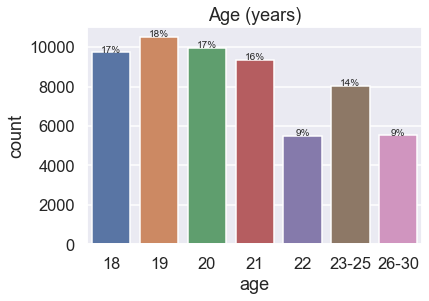

In [5]:
# barplot of age distribution (w/ percentages)
add_percentages(sns.countplot(x = ageSeries, order = ['18','19','20','21','22','23-25','26-30']))
plt.title('Age (years)');

### 2) What's the distribution of <span style="color:red">RACE</span> in respondents?

In [6]:
# simplify race names for readability
raceNames = {'race_white':'WHITE', 'race_black':'BLACK', 'race_his_temp':'LATINO', 'race_asian':'ASIAN',
             'race_ainaan':'AMERIN', 'race_mides':'ARAB', 'race_pi':'PACIF', 'race_other':'OTHER' }
raceSeries = tidy_race.race.replace(raceNames, regex=True)
tidy_race.race = raceSeries

posx and posy should be finite values
posx and posy should be finite values


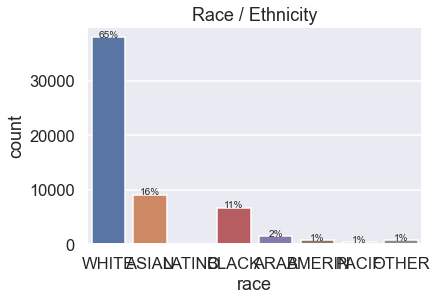

In [7]:
# barplot of race distribution (w/ percentages)
add_percentages(sns.countplot(x = raceSeries, order = ['WHITE','ASIAN','LATINO','BLACK',
                                                                    'ARAB','AMERIN','PACIF','OTHER']))
plt.title('Race / Ethnicity');

### 3) What's the distribution of <span style="color:red">DEGREE TYPE</span> in respondents?

In [8]:
# simplify degree names for readability
degreeNames_keys = [col for col in HMS_demo.columns if ('degree' in col) & ('text' not in col)]
degreeNames_values = ['Associates', 'Bachelors', 'Masters', 'JD', 'MD', 'PhD', 'Other', 'Non-Degree']
degreeNames = dict(zip(degreeNames_keys,degreeNames_values))

degreeSeries = tidy_degreeType.degreeType.replace(degreeNames, regex=True)
tidy_degreeType.degreeType = degreeSeries

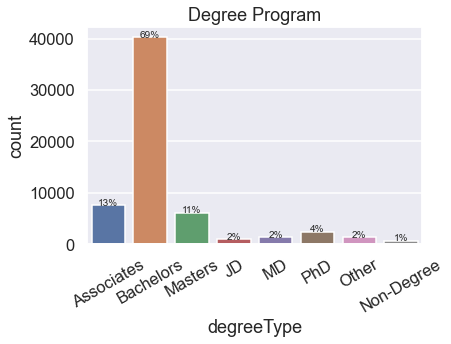

In [9]:
# barplot of degree type distribution (w/ percentages)
ax = add_percentages(sns.countplot(x=degreeSeries))
plt.title('Degree Program')
ax.set_xticklabels(degreeNames_values, rotation=30);

### 7) What's the distribution of <span style="color:red">FIELD OF STUDY</span> in respondents?

In [10]:
# simplify field of study names for readability
fieldNames_keys = [col for col in HMS_demo.columns if ('field' in col) & ('text' not in col)]
fieldNames_values = ['HUM', 'NAT', 'SOC', 'ARC', 'ART', 'BUS','DEN','ED','ENG','LAW',
                     'MED','MUS','NUR','PHARM','PREP','PH','PP','SW','UND','OTHER']
fieldNames = dict(zip(fieldNames_keys, fieldNames_values))

fieldSeries = tidy_fieldOfStudy.fieldOfStudy.replace(fieldNames, regex=True)
tidy_fieldOfStudy.fieldOfStudy = fieldSeries

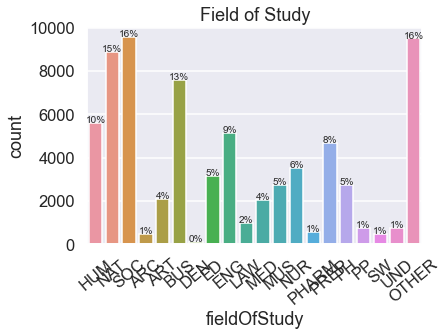

In [11]:
# barplot of field of study distribution (w/ percentages)
ax = add_percentages(sns.countplot(x=fieldSeries))
plt.title('Field of Study')
ax.set_xticklabels(fieldNames_values, rotation=40);

### 8) What's the distribution of <span style="color:red">EXTRACURRICULAR ACTIVITIES</span> in respondents?

In [12]:
# simplify extracurricular names for readability
activityNames_keys = [col for col in HMS.columns if ('activ' in col) & ('text' not in col)]
activityNames_values = ['ACAD', 'ATH_C', 'ATH_V', 'ATH_I', 'COM', 'CUL','DANCE','GREEK','SEX','GOV',
                         'HEALTH','MEDIA','MUSIC', 'RELIG','SOCIAL','ART','OTHER','NONE']
activityNames = dict(zip(activityNames_keys, activityNames_values))

activitySeries = tidy_activity.activity.replace(activityNames, regex=True)
tidy_activity.activity = activitySeries

In [ ]:
# barplot of extracurricular distribution (w/ percentages)
ax = add_percentages(sns.countplot(x=activitySeries))
plt.title('Extracurricular Activities')
ax.set_xticklabels(activityNames_values, rotation=40);

## STEP #2: Psychological Inflexibility (AAQ-II)

### <span style="color:red">0) A brief overview of the AAQ-II statistic </span>

### 0.1) AAQ-II Questionnaire:

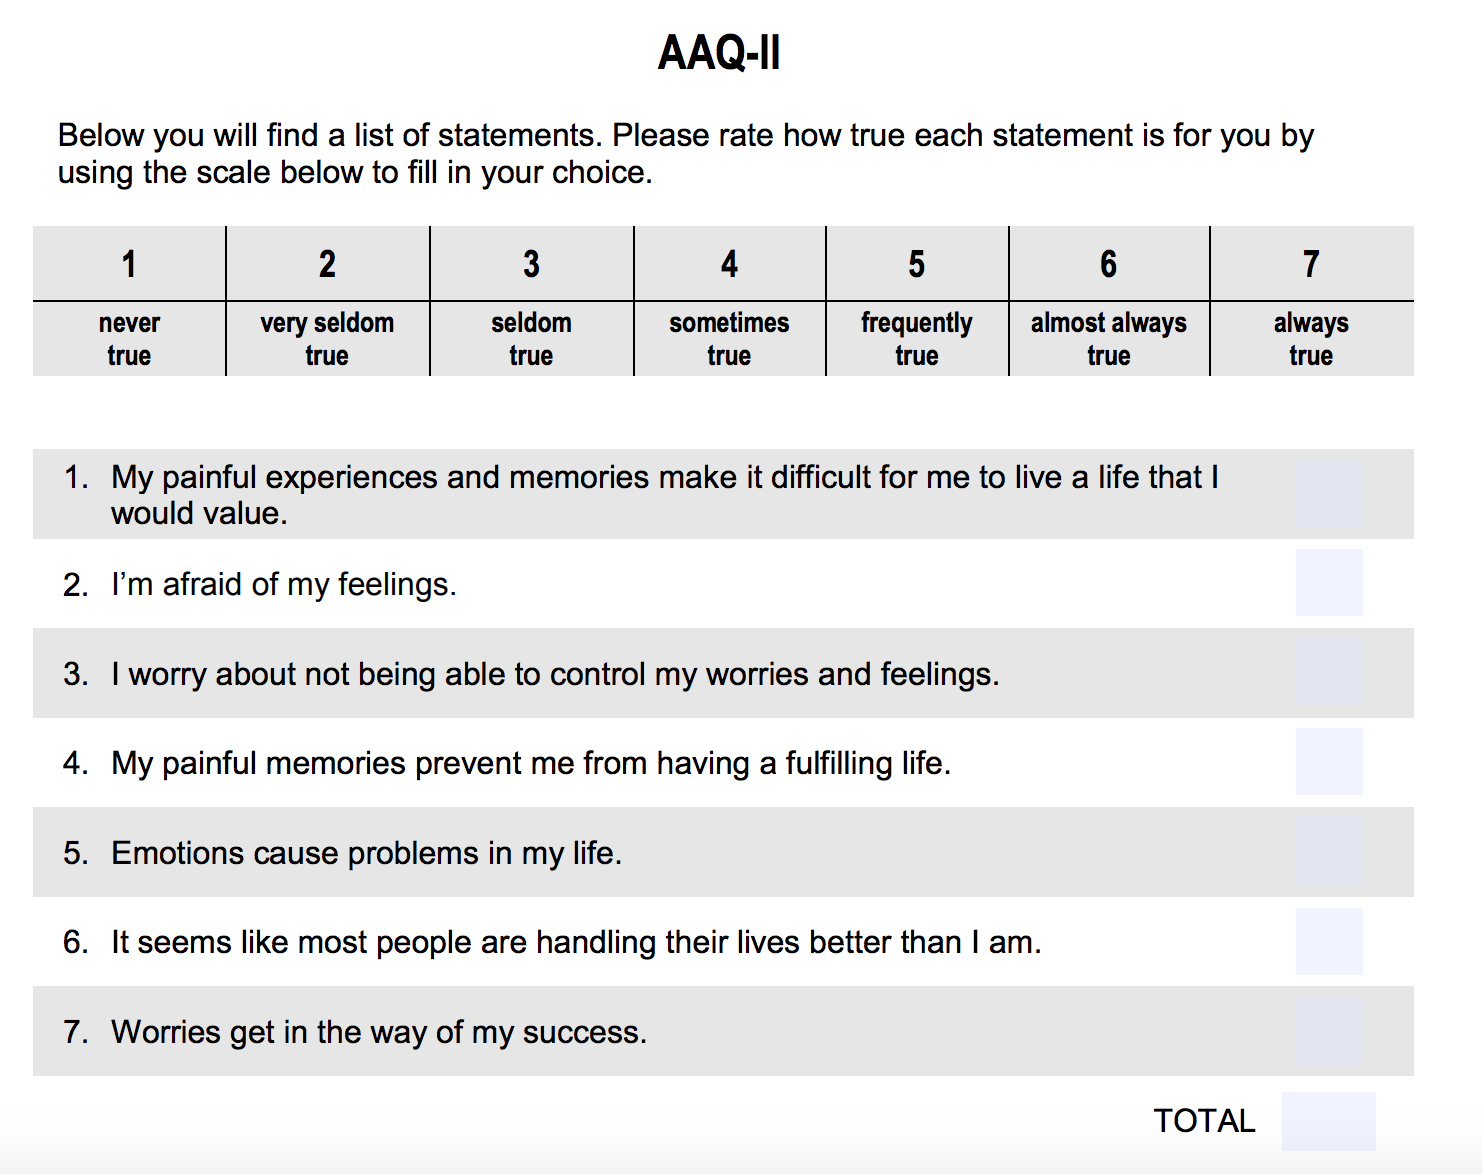

In [14]:
display(Image(filename='images/AAQ_Questions.png', embed=True, width=600))

### 0.2) Notes on the AAQ-II statistic
<li> <span style="color:red"> High AAQ-II = bad, low AAQ-II = good </span>
<li> <span style="color:red">AAQ-II measures "psychological inflexibility" </span>, defined by the ACBS (http://bit.ly/1WB8wRR) as:
     - "the ability to fully contact the present moment and the thoughts & feelings it contains without needless defense, affords, persisting, or changing behavior in the pursuit of goals and values"
    
<li> Psychological flexibility is <span style="color:red">the "bedrock" skill of acceptance-commitment-therapy (ACT)</span> (http://bit.ly/2zFUAnK).
     - ACT is an evidence supported intervention for everything from severe mental illness to leadership and organizational wellbeing.

### 0.3) Accumulating AAQ-II research has shown that...

- AAQ-II has proven to be <span style="color:red"> an accurate measure of psychological flexibility (PF)</span>, with a Cronbach’s alpha of 0.84
    - source: http://bit.ly/2iXF7VH
- Psychological flexibility (PF) is <span style="color:red">positively associated with psychological well-being</span>
    - source: http://bit.ly/2A27fSn
- There is consistently a <span style="color:red"> strong relationship between mindfulness and PF </span>. Both separately and independently account for unique variance in general and specific forms of distress (including depression and anxiety).
    - source: http://bit.ly/2ikJQRP

### 0.4) Table of AAQ-II correlations

#### <span style="color:red"> Summary: AAQ-II has shown to be highly correlated with higher levels of depression, anxiety, stress, and overall psychological distress</span>
- research source: https://www.sciencedirect.com/science/article/pii/S0005789411000888

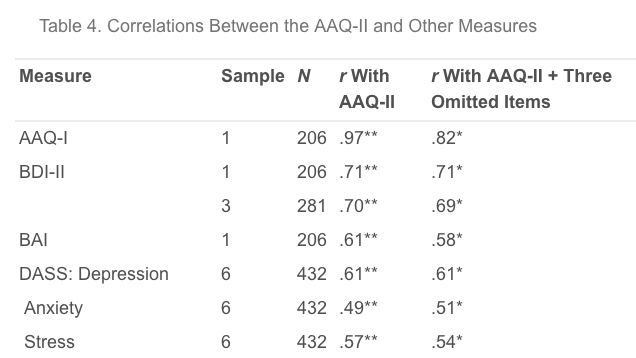

In [15]:
display(Image(filename='images/AAQ-II_Correlations_small.png', embed=True, width=500))

### 1) AAQ individual questions

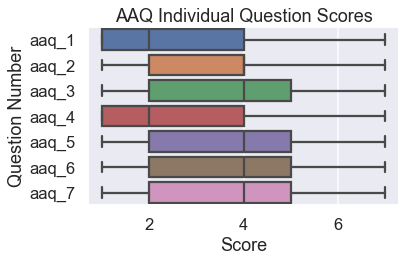

In [16]:
# create boxplots to visualize distributions
sns.boxplot(data=HMS_aaq.drop(['AAQ_total'], axis=1), orient="h");
plt.title('AAQ Individual Question Scores');
plt.xlabel('Score')
plt.ylabel('Question Number')
plt.tight_layout(pad=2)
plt.savefig('AAQ_individual_scores.png')
plt.show()

In [17]:
# generate summary statistics for each question
HMS_aaq.drop(['AAQ_total'], axis=1).describe();

In [18]:
# investigate correlation of individual questions
HMS_aaq.drop(['AAQ_total'], axis=1).corr();

#### NOTE: Questions 1/4 & 3/7 have very similar wording (i.e. 'painful memories', 'worries'), hence the correlation

### 2) AAQ total score

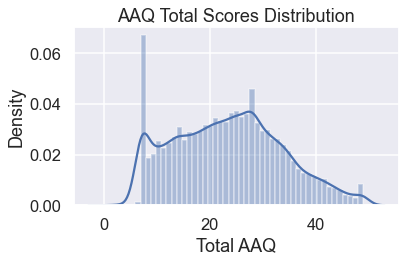

In [19]:
sns.distplot((HMS_aaq.AAQ_total).dropna());
plt.title('AAQ Total Scores Distribution');
plt.xlabel('Total AAQ')
plt.tight_layout(pad=2)
plt.savefig('AAQ_total_scores.png')
plt.show()

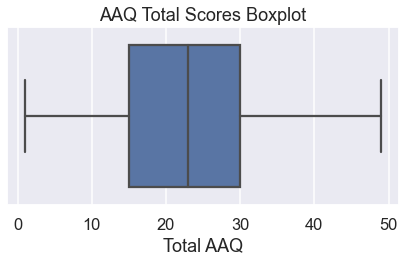

In [20]:
sns.boxplot((HMS_aaq.AAQ_total).dropna());
plt.title('AAQ Total Scores Boxplot')
plt.xlabel('Total AAQ')
plt.tight_layout(pad=2)
plt.savefig('AAQ_boxplot.png')
plt.show();

In [21]:
HMS_aaq.AAQ_total.dropna().describe()

count    27560.000000
mean        23.373331
std         10.259374
min          1.000000
25%         15.000000
50%         23.000000
75%         30.000000
max         49.000000
Name: AAQ_total, dtype: float64

## STEP #3: Pairwise - Demographics & Psych Inflexibility

### 1) Age vs. AAQ

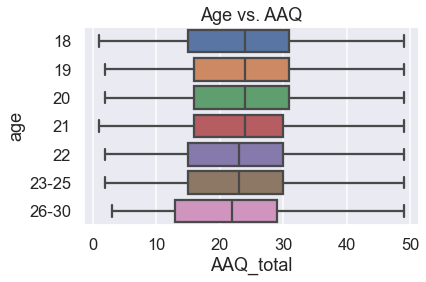

In [22]:
# create side-by-side boxplots for every age group
ageLabels = ['18','19','20','21','22','23-25','26-30']
ax = sns.boxplot(y='age', x='AAQ_total', data = tidy_age, order = ageLabels, orient = 'h');
ax.set_yticklabels(ageLabels);
plt.title('Age vs. AAQ');
plt.tight_layout(pad=1)
plt.savefig('AAQ_age.png')
plt.show()

#### <span style="color:red">NOTE: it appears that as age goes up, AAQ goes down</span>

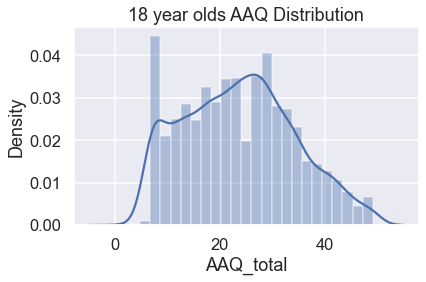

In [23]:
# plot distribution of 18 year olds AAQ scores
sns.distplot(tidy_age[tidy_age.age == '18'].AAQ_total.dropna());
plt.title('18 year olds AAQ Distribution');
plt.tight_layout(pad=1)
plt.savefig('AAQ_age18.png')
plt.show()

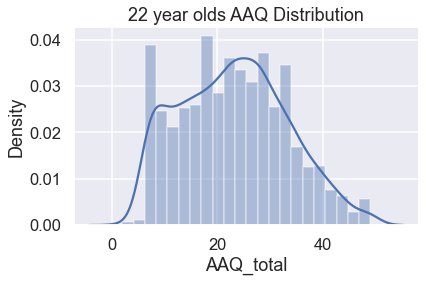

In [24]:
# plot distribution of 26-30 year olds AAQ scores
sns.distplot(tidy_age[tidy_age.age == '22'].AAQ_total.dropna());
plt.title('22 year olds AAQ Distribution');
plt.tight_layout(pad=1)
plt.savefig('AAQ_age22.png')
plt.show()

### 2) Race vs. AAQ

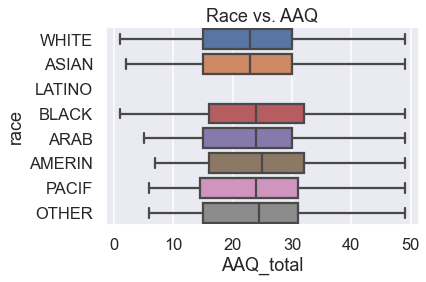

In [25]:
# create side-by-side boxplots for every race
raceLabels = ['WHITE','ASIAN','LATINO','BLACK','ARAB','AMERIN','PACIF','OTHER']
ax = sns.boxplot(y='race', x='AAQ_total', data=tidy_race, order = raceLabels, orient = 'h');
ax.set_yticklabels(raceLabels);
plt.title('Race vs. AAQ');
plt.tight_layout(pad=1)
plt.savefig('AAQ_race.png')
plt.show()

#### <span style="color:red">NOTE: it appears American Indians have the highest avg AAQ, while Arabs have the lowest</span>

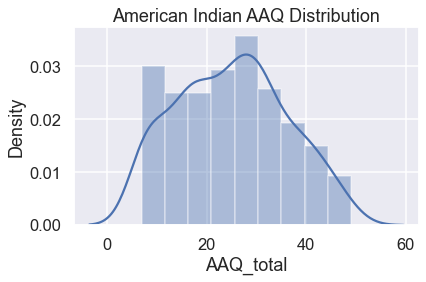

In [27]:
# plot distribution of American Indian AAQ scores
sns.distplot(tidy_race[tidy_race.race == 'AMERIN'].AAQ_total.dropna());
plt.title('American Indian AAQ Distribution');
plt.tight_layout(pad=1)
plt.savefig('AAQ_race_AMERIN.png')
plt.show()

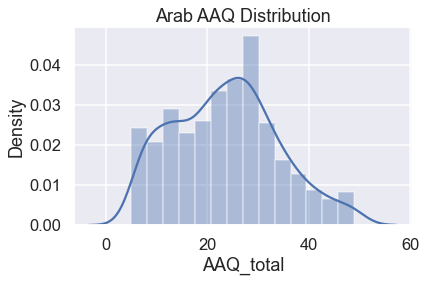

In [28]:
# plot distribution of Arab AAQ scores
sns.distplot(tidy_race[tidy_race.race == 'ARAB'].AAQ_total.dropna());
plt.title('Arab AAQ Distribution');
plt.tight_layout(pad=1)
plt.savefig('AAQ_race_ARAB.png')
plt.show()

### 6) Degree Type vs. AAQ

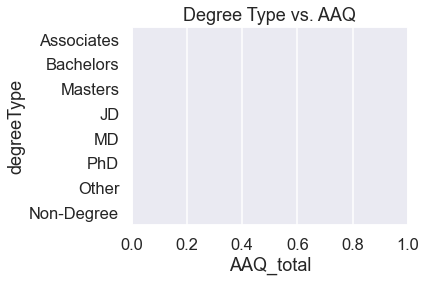

In [29]:
# create side-by-side boxplots for each degree type
degreeLabels = ['Associates', 'Bachelors', 'Masters', 'JD', 'MD', 'PhD', 'Other', 'Non-Degree']
ax = sns.boxplot(y='degreeType', x='AAQ_total', data=tidy_degreeType, order = degreeLabels, orient='h');
ax.set_yticklabels(degreeLabels);
plt.title('Degree Type vs. AAQ');
plt.tight_layout(pad=1)
plt.savefig('AAQ_degree.png')
plt.show()

#### <span style="color:red"> NOTE: it appears Bachelors students have the highest AAQ while MD students have the lowest </span>

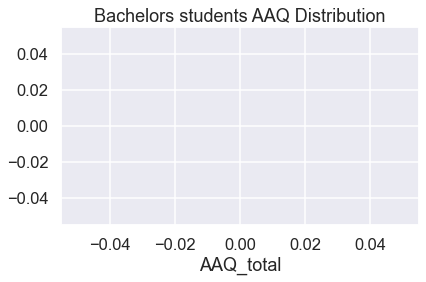

In [30]:
# plot distribution of 'Bachelors' AAQ scores
sns.distplot(tidy_degreeType[tidy_degreeType.degreeType == 'Bachelors'].AAQ_total.dropna());
plt.title("Bachelors students AAQ Distribution");
plt.tight_layout(pad=1)
plt.savefig('AAQ_degree_Bach.png')
plt.show()

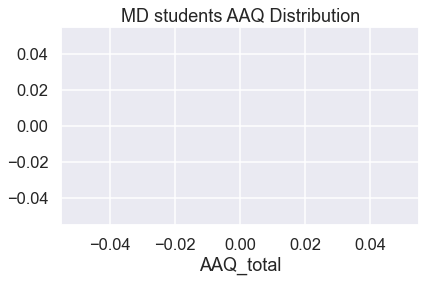

In [31]:
# plot distribution of 'MD' AAQ scores
sns.distplot(tidy_degreeType[tidy_degreeType.degreeType == 'MD'].AAQ_total.dropna());
plt.title("MD students AAQ Distribution");
plt.tight_layout(pad=1)
plt.savefig('AAQ_degree_MD.png')
plt.show()

### 7) Field of Study vs. AAQ

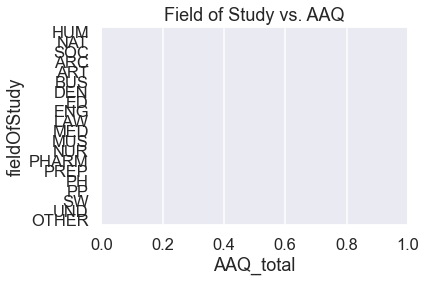

In [32]:
# create side-by-side boxplots for each field of study
fieldLabels = ['HUM', 'NAT', 'SOC', 'ARC', 'ART', 'BUS','DEN','ED','ENG','LAW',
                     'MED','MUS','NUR','PHARM','PREP','PH','PP','SW','UND','OTHER']
ax = sns.boxplot(y='fieldOfStudy', x='AAQ_total', data=tidy_fieldOfStudy, order = fieldLabels, orient='h');
ax.set_yticklabels(fieldLabels);
plt.title('Field of Study vs. AAQ');
plt.tight_layout(pad=1)
plt.savefig('AAQ_field.png')
plt.show()

#### <span style="color:red"> NOTE: it appears Humanities students have the highest AAQ while Medicine students have the lowest </span>

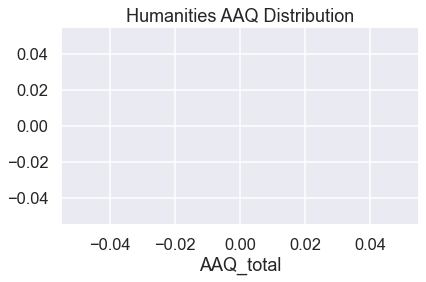

In [33]:
# plot distribution of 'Humanities' AAQ scores
sns.distplot(tidy_fieldOfStudy[tidy_fieldOfStudy.fieldOfStudy == 'HUM'].AAQ_total.dropna());
plt.title("Humanities AAQ Distribution");
plt.tight_layout(pad=1)
plt.savefig('AAQ_field_Hum.png')
plt.show()

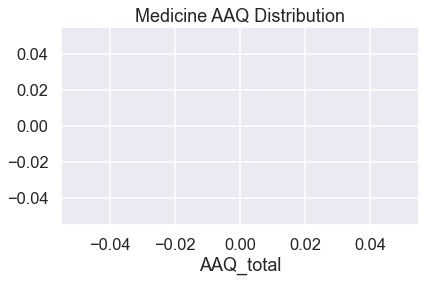

In [34]:
# plot distribution of 'Medicine' AAQ scores
sns.distplot(tidy_fieldOfStudy[tidy_fieldOfStudy.fieldOfStudy == 'MED'].AAQ_total.dropna());
plt.title("Medicine AAQ Distribution");
plt.tight_layout(pad=1)
plt.savefig('AAQ_field_Med.png')
plt.show()

### 8) Extracurricular Activity vs. AAQ

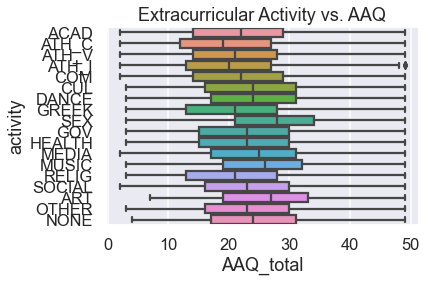

In [35]:
# create side-by-side boxplots for each extracurricular activity
activityLabels = ['ACAD', 'ATH_C', 'ATH_V', 'ATH_I', 'COM', 'CUL','DANCE','GREEK','SEX','GOV',
                         'HEALTH','MEDIA','MUSIC', 'RELIG','SOCIAL','ART','OTHER','NONE']
ax = sns.boxplot(y='activity', x='AAQ_total', data=tidy_activity, order = activityLabels, orient='h');
ax.set_yticklabels(activityLabels);
plt.title('Extracurricular Activity vs. AAQ');
plt.tight_layout(pad=1)
plt.savefig('AAQ_activities.png')
plt.show()

#### <span style="color:red"> NOTE: it appears students involved with Gender/Sexuality Orgs have the highest AAQ, while Varsity Athletes have the lowest</span>

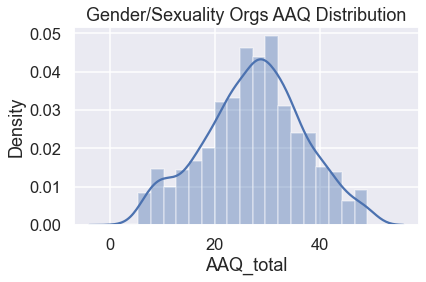

In [36]:
# plot distribution of 'Gender/Sexuality Orgs' AAQ scores
sns.distplot(tidy_activity[tidy_activity.activity == 'SEX'].AAQ_total.dropna());
plt.title("Gender/Sexuality Orgs AAQ Distribution");
plt.tight_layout(pad=1)
plt.savefig('AAQ_activities_SEX.png')
plt.show()

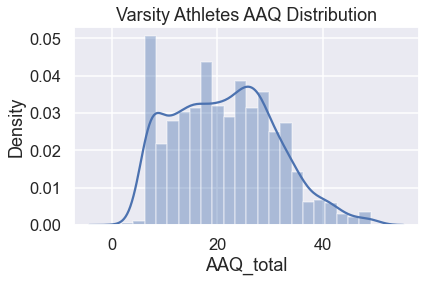

In [37]:
# plot distribution of 'Varsity Athletes' AAQ scores
sns.distplot(tidy_activity[tidy_activity.activity == 'ATH_V'].AAQ_total.dropna());
plt.title("Varsity Athletes AAQ Distribution");
plt.tight_layout(pad=1)
plt.savefig('AAQ_varsity_VAR.png')
plt.show()

# STEP #4: Overall academic performance


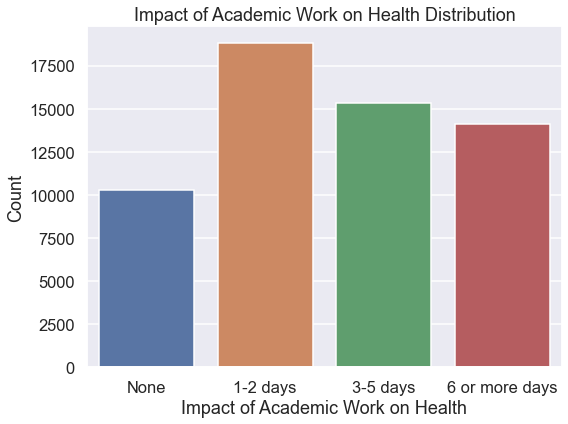

In [38]:
#students have been asked : In the past 4 weeks, how many days have you felt that emotional or mental difficulties have hurt your
#academic performance?

plt.figure(figsize=(8, 6))
sns.countplot(x='aca_impa', data=HMS_mhstatus)

# Define labels for the x-axis ticks
plt.xticks(ticks=[0, 1, 2, 3], labels=['None', '1-2 days', '3-5 days', '6 or more days'])

plt.xlabel('Impact of Academic Work on Health')
plt.ylabel('Count')
plt.title('Impact of Academic Work on Health Distribution')
plt.tight_layout()
plt.show()

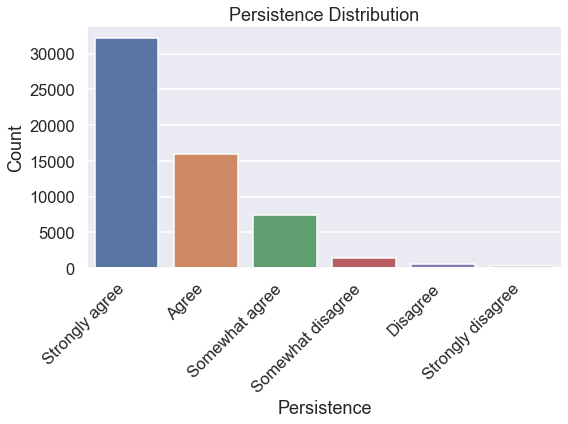

In [39]:
#How much do you agree with the following statement?:
#I am confident that I will be able to finish my degree no
#matter what challenges I may face:

# Define custom labels for the x-axis ticks
persist_labels = [
    'Strongly agree', 'Agree', 'Somewhat agree',
    'Somewhat disagree', 'Disagree', 'Strongly disagree'
]

plt.figure(figsize=(8, 6))
ax = sns.countplot(x='persist', data=HMS_mhstatus)

# Set the defined labels for the x-axis ticks and rotate them for better readability
ax.set_xticklabels(persist_labels, rotation=45, ha='right')

plt.xlabel('Persistence')
plt.ylabel('Count')
plt.title('Persistence Distribution')
plt.tight_layout()
plt.show()

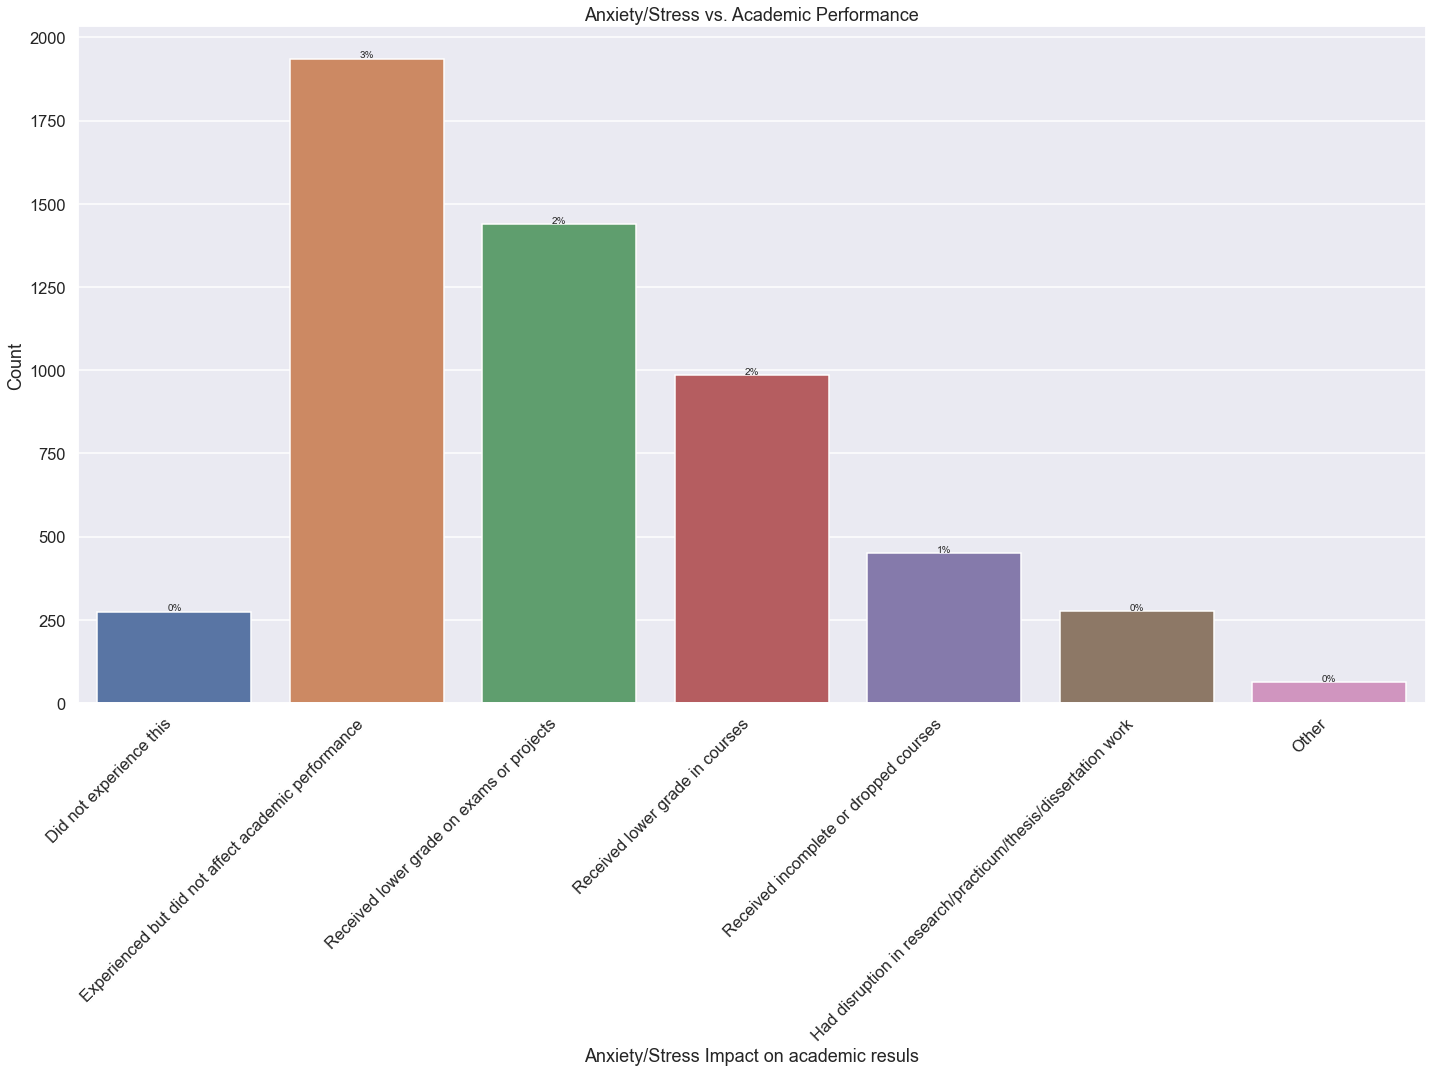

In [45]:
#
# Mapping for readability of labels
anxiety_labels = {
    1: 'Did not experience this',
    2: 'Experienced but did not affect academic performance',
    3: 'Received lower grade on exams or projects',
    4: 'Received lower grade in courses',
    5: 'Received incomplete or dropped courses',
    6: 'Had disruption in research/practicum/thesis/dissertation work',
    7: 'Other'
}

# Replace numerical values with descriptive labels
anxietySeries = tidy_anxietyStressVsAcademic.anxietyStressVsAcademic.replace(anxiety_labels)

# Create a countplot with percentages
plt.figure(figsize=(20, 15))
ax = sns.countplot(x=anxietySeries)
plt.title('Anxiety/Stress vs. Academic Performance')
ax = add_percentages(ax)  # Function to add percentages to the plot
ax.set_xticklabels(anxiety_labels.values(), rotation=30)  # Set custom labels with rotation
plt.xlabel('Anxiety/Stress Impact on academic resuls')
plt.ylabel('Count')
plt.tight_layout()

ax.set_xticklabels(anxiety_labels.values(), rotation=45, ha='right')
plt.tight_layout()
plt.show()


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


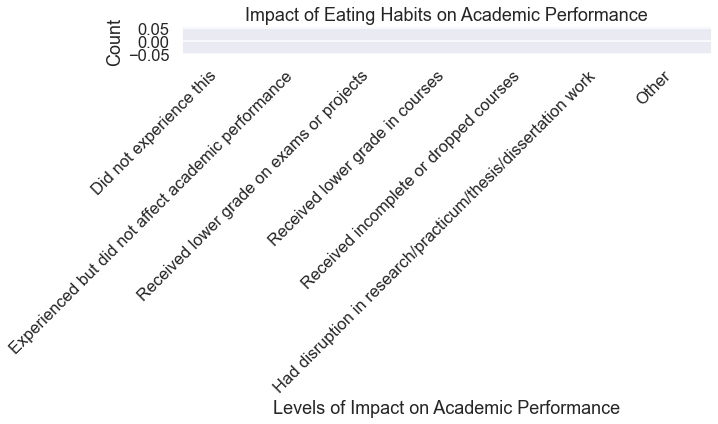

In [48]:
# Mapping for readability of labels
eating_labels = {
    1: 'Did not experience this',
    2: 'Experienced but did not affect academic performance',
    3: 'Received lower grade on exams or projects',
    4: 'Received lower grade in courses',
    5: 'Received incomplete or dropped courses',
    6: 'Had disruption in research/practicum/thesis/dissertation work',
    7: 'Other'
}

# Replace numerical values with descriptive labels
eatingSeries = tidy_eatingVsAcademic.eatingVsAcademic.replace(eating_labels)

# Create a countplot with adjusted figure size and x-axis label rotation
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=eatingSeries, order=eating_labels.values())
plt.title('Impact of Eating Habits on Academic Performance')
ax = add_percentages(ax)  # Function to add percentages to the plot
plt.xlabel('Levels of Impact on Academic Performance')
plt.ylabel('Count')

# Manually set the x-axis labels
ax.set_xticklabels(eating_labels.values(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

## STEP #5: Pass variables to next Jupyter notebook

In [ ]:
# cleaned dataset
%store HMS

# separated modules
%store HMS_ids
%store HMS_demo
%store HMS_mhstatus
%store HMS_mhhelp
%store HMS_aaq

# tidy variable groups
%store tidy_race
%store tidy_religion
%store tidy_degreeType
%store tidy_fieldOfStudy
%store tidy_activity
%store tidy_age
%store tidy_gender
%store tidy_relig